In [35]:
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [36]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

#Read the dataset
df = pd.read_csv("train.csv")

df = df.drop("Province_State",axis=1)
df = df[df["Country_Region"]=="India"]

confirmed_data = df["ConfirmedCases"].values
fatalities_data = df["Fatalities"].values
dates = df["Date"]
train_date = dates[:60]
test_date = dates[-10:]
print(len(train_date))
print(len(test_date))

#normalising the dataset
scaler = StandardScaler()
scaled_confirmed = scaler.fit_transform(confirmed_data.reshape(-1, 1))
scaled_fatalities = scaler.fit_transform(fatalities_data.reshape(-1, 1))

train_confirmed = scaled_confirmed[:60]
test_confirmed = scaled_confirmed[60:]


train_fatalities = scaled_fatalities[:60]
test_fatalities = scaled_fatalities[60:]

inp_size = 7

60
10


In [37]:
# Model to predict Confirmed cases

X,y = split_sequence(train_confirmed,inp_size)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# print(X)

# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(inp_size, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=400, verbose=0)

In [38]:
confirmed_test_x,confirmed_test_y = split_sequence(test_confirmed,inp_size)
# print(confirmed_test_x,confirmed_test_y)

In [39]:

pred_conf_cases = []
for i in confirmed_test_x:
    x_input = array(i)
    x_input = x_input.reshape((1, inp_size, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred_conf_cases.append(yhat[0][0])
print(pred_conf_cases)
print(len(pred_conf_cases))

[0.34991008, 0.41782272, 0.47939843, 0.55790204, 0.6434252, 0.7686823, 0.93325406, 1.1433891, 1.4695555, 1.876453]
10


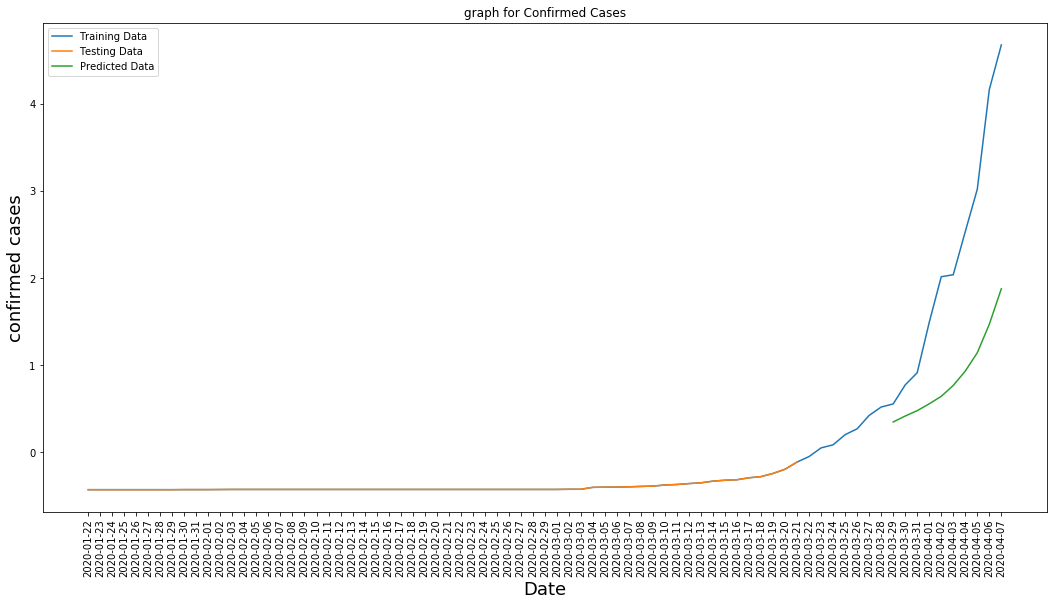

In [40]:
plt.figure(figsize = (18,9))
plt.plot(df['Date'],scaled_confirmed,label="Training Data")
plt.plot(train_date,train_confirmed,label="Testing Data")
plt.plot(test_date,pred_conf_cases,label="Predicted Data")
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=18)
plt.ylabel('confirmed cases',fontsize=18)
plt.title("graph for Confirmed Cases")
plt.legend()
plt.show()
# train.head()

In [41]:
# Model to predict Fatalities
X2,y2 = split_sequence(train_fatalities,inp_size)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X2 = X2.reshape((X2.shape[0], X2.shape[1], n_features))
# print(X2)
# define model
model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(inp_size, n_features)))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
# fit model
model2.fit(X2, y2, epochs=400, verbose=0)

In [42]:
Fatalities_test_x,Fatalities_test_y = split_sequence(test_fatalities,inp_size)
# print(Fatalities_test_x,Fatalities_test_y)

In [43]:
#predicted2 = test[inp_size:]
#predicted_Date2 = df["Date"]
pred_fata_cases = []
for i in Fatalities_test_x:
    x_input = array(i)
    x_input = x_input.reshape((1, inp_size, n_features))
    yhat = model2.predict(x_input, verbose=0)
    pred_fata_cases.append(yhat[0][0])
print(pred_fata_cases)

[0.046254262, 0.075326666, 0.096385926, 0.11979187, 0.14568666, 0.16429186, 0.19092241, 0.23568699, 0.29810685, 0.40468368]


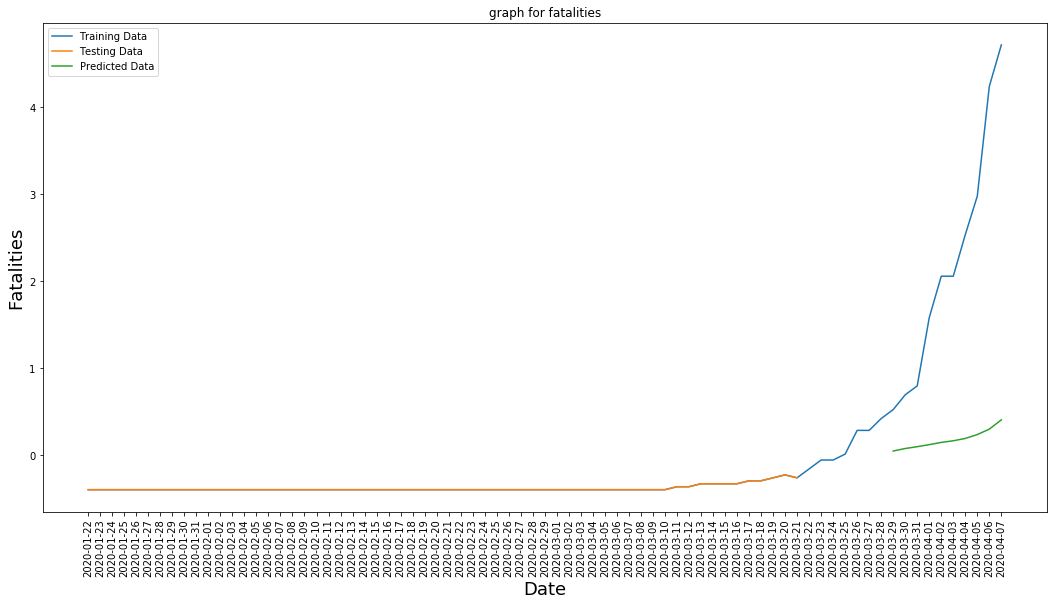

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,9))
plt.plot(df['Date'],scaled_fatalities,label="Training Data")
plt.plot(train_date,train_fatalities,label="Testing Data")
plt.plot(test_date,pred_fata_cases,label="Predicted Data")
plt.xticks(rotation=90)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Fatalities',fontsize=18)
plt.title("graph for fatalities")
plt.legend()
plt.show()
# train.head()

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 100)               20800     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________
